## **MELANOMA DETECTION ASSIGNMENT**

**Problem statement**: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# **Importing Skin Cancer Data**


**To do: Take necessary actions to read the data**

## Importing all the important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import PIL
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
data_dir_train = pathlib.Path("images/Train")
data_dir_test = pathlib.Path('images/Test')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# Get the train and test folders from gdrive
import pathlib
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test  = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
# List directory in train folder
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
# List directory in test folder
dir_test = os.listdir(data_dir_test)
dir_test.sort()
dir_test

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
#both test & train have same folders (disease folder ), now check the no. of datapoints in each folder

#total train dataset
total_train_data = len(list(data_dir_train.glob("*/*.jpg")))
total_train_data

2259

In [ ]:
#total test dataset
total_test_data = len(list(data_dir_test.glob("*/*.jpg")))
total_test_data

118

In [ ]:
# train data in each folders
data_detail_pd = pd.DataFrame(columns=["Dir_Name","Total Image(Train)","Total Percentage(Train)","Total Image(Test)","Total Percentage(Test)"])

for dir_name in dir_train:
   total_image_in_folder = len(list(data_dir_train.glob(dir_name+"/*.jpg")))
   df = {"Dir_Name":dir_name,"Total Image(Train)":total_image_in_folder,"Total Percentage(Train)":round((total_image_in_folder/total_train_data)*100,2)}
   data_detail_pd = data_detail_pd.append(df,ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Dir_Name")
#display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))

<ipython-input-9-047afd3a42a4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_detail_pd = data_detail_pd.append(df,ignore_index=True)
<ipython-input-9-047afd3a42a4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_detail_pd = data_detail_pd.append(df,ignore_index=True)
<ipython-input-9-047afd3a42a4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_detail_pd = data_detail_pd.append(df,ignore_index=True)
<ipython-input-9-047afd3a42a4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_detail_pd = data_detail_pd.append(df,ignore_index=True)
<ipython-input-9-047afd3a42a4>:7: FutureWarning: The frame.append method is depr

In [ ]:
# test data in each folders

for dir_name in dir_test:
   total_image_in_folder = len(list(data_dir_test.glob(dir_name+"/*.jpg")))
   data_detail_pd.loc[dir_name,"Total Image(Test)"]  = total_image_in_folder
   data_detail_pd.loc[dir_name,"Total Percentage(Test)"]  = round((total_image_in_folder/total_train_data)*100,2)
display(data_detail_pd.sort_values(by="Total Percentage(Train)",ascending=False))

,Total Image(Train),Total Percentage(Train),Total Image(Test),Total Percentage(Test)
Dir_Name,,,,
pigmented benign keratosis,462,20.45,16,0.71
melanoma,448,19.83,16,0.71
basal cell carcinoma,386,17.09,16,0.71
nevus,357,15.80,16,0.71
squamous cell carcinoma,181,8.01,16,0.71
vascular lesion,139,6.15,3,0.13
actinic keratosis,114,5.05,16,0.71
dermatofibroma,95,4.21,16,0.71
seborrheic keratosis,77,3.41,3,0.13


Inference

a. 20% of the data is present in train set

b. 0.71% of data is present in test set

c. Highest percentage of data is present in Pigmented benign keratosis

d. Lowest percentage of data is present in Seborrheic keratosis

# Visualizing the dataset

## **Todo, create a code to visualize one instance of all the nine classes present in the dataset**


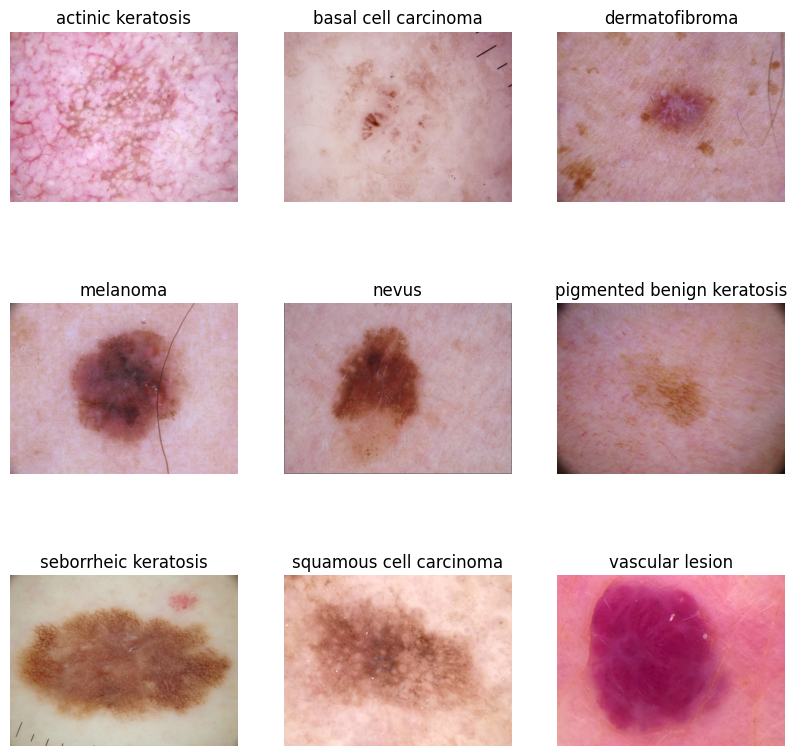

In [ ]:
#getting one image from each folder
import glob
import matplotlib.image as mpimg

file_path = []
class_name = []

#getting one file path from each folder
for dir_name in dir_train:
  path = str(data_dir_train) +"/"+ dir_name
  for file_name in glob.iglob(path+'/*.jpg', recursive=True):
    #print(file_name)
    file_path.append(file_name)
    class_name.append(dir_name)
    break


#displaying one image from each folder
plt.figure(figsize=(10,10))
for i in range(len(class_name)):
  ax = plt.subplot(3,3,i+1) 
  img = mpimg.imread(file_path[i])
  plt.imshow(img)
  plt.axis("off")
  plt.title(class_name[i])

**Load using keras.preprocessing**

Let's load these images off disk using the helpful image_dataset_from_directory utility.

# Loading the images for model input



[Define some parameters for the loader:](https://)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [ ]:
#data loader params
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# load the train dataset in batches of size 32 and resize the image into 180*180 pixel
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 6759 files belonging to 9 classes.
Using 5408 files for training.


In [ ]:
# load validation dataset in batches of size 32, resize the image into 180*180 pixel
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size

)
    

Found 6759 files belonging to 9 classes.
Using 1351 files for validation.


In [ ]:
# Since it is a multiclassifier it's essential to know the different classes present in it
num_classes = len(val_ds.class_names)
num_classes

9

In [ ]:
#class names
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']


Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
     

## **MODEL BUILDING AND TRAINING**

### **Todo:**
 Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]


# MODEL 1

### **Create a model**

In [ ]:
#model design ( CNN Model)

model = Sequential([
         layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
         layers.Conv2D(16,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(32,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Conv2D(64,3,padding='same',activation="relu"),
         layers.MaxPool2D((2,2),strides=2),
         layers.Flatten(),
         layers.Dense(128,activation="relu"),
         layers.Dense(num_classes)
])

Choose an appropirate optimiser and loss function for model training

In [ ]:
# model compilation
# Todo, choose an appropirate optimiser and loss function

model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
  

In [ ]:
#model design summary
# View the summary of all layers

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## **Train the model for ~20 epochs**

In [21]:
#train the model : run the model on train & validation set
epochs = 20 
history = model.fit( train_ds , validation_data= val_ds , epochs = epochs)

Epoch 1/20
169/169 [==============================] - 1429s 2s/step - loss: 1.9651 - accuracy: 0.2435 - val_loss: 1.5583 - val_accuracy: 0.4182
Epoch 2/20
169/169 [==============================] - 3s 20ms/step - loss: 1.4365 - accuracy: 0.4599 - val_loss: 1.2852 - val_accuracy: 0.5189
Epoch 3/20
169/169 [==============================] - 4s 21ms/step - loss: 1.2042 - accuracy: 0.5614 - val_loss: 1.1168 - val_accuracy: 0.5944
Epoch 4/20
169/169 [==============================] - 3s 20ms/step - loss: 1.0104 - accuracy: 0.6339 - val_loss: 1.0948 - val_accuracy: 0.6136
Epoch 5/20
169/169 [==============================] - 3s 20ms/step - loss: 0.7942 - accuracy: 0.7163 - val_loss: 0.9323 - val_accuracy: 0.6773
Epoch 6/20
169/169 [==============================] - 3s 20ms/step - loss: 0.6467 - accuracy: 0.7783 - val_loss: 0.8397 - val_accuracy: 0.7202
Epoch 7/20
169/169 [==============================] - 3s 20ms/step - loss: 0.4876 - accuracy: 0.8343 - val_loss: 0.8286 - val_accuracy: 0.732

### **Visualizing the training results**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.**

1. In the first chart the model is overfitting

2. The validation loss is increasing after 5 epochs, whereas the training loss is dicreasing

3. For the training dataset the accuracy of the model is increasing whereas for the test dataset it is decreasing.

# **Choose an appropriate data augmentation strategy to resolve underfitting/overfitting**

In [ ]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
    layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

In [ ]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

# MODEL 2

## **Create the model**

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = len(class_name)
model = Sequential([data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

## **Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Train the model**

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 13s 125ms/step - loss: 2.0504 - accuracy: 0.2052 - val_loss: 2.0591 - val_accuracy: 0.1929
Epoch 2/20
57/57 [==============================] - 5s 91ms/step - loss: 2.0334 - accuracy: 0.2013 - val_loss: 2.0257 - val_accuracy: 0.1885
Epoch 3/20
57/57 [==============================] - 5s 88ms/step - loss: 2.0282 - accuracy: 0.2019 - val_loss: 2.0300 - val_accuracy: 0.1885
Epoch 4/20
57/57 [==============================] - 5s 89ms/step - loss: 2.0136 - accuracy: 0.2080 - val_loss: 2.0364 - val_accuracy: 0.1885
Epoch 5/20
57/57 [==============================] - 5s 88ms/step - loss: 2.0144 - accuracy: 0.2013 - val_loss: 2.0257 - val_accuracy: 0.1929
Epoch 6/20
57/57 [==============================] - 5s 88ms/step - loss: 2.0205 - accuracy: 0.1980 - val_loss: 2.0296 - val_accuracy: 0.1885
Epoch 7/20
57/57 [==============================] - 5s 92ms/step - loss: 2.0163 - accuracy: 0.2052 - val_loss: 2.0323 - val_accuracy: 0.1885
Epoch 8/20
57/57 [====

### **Visualize the results**

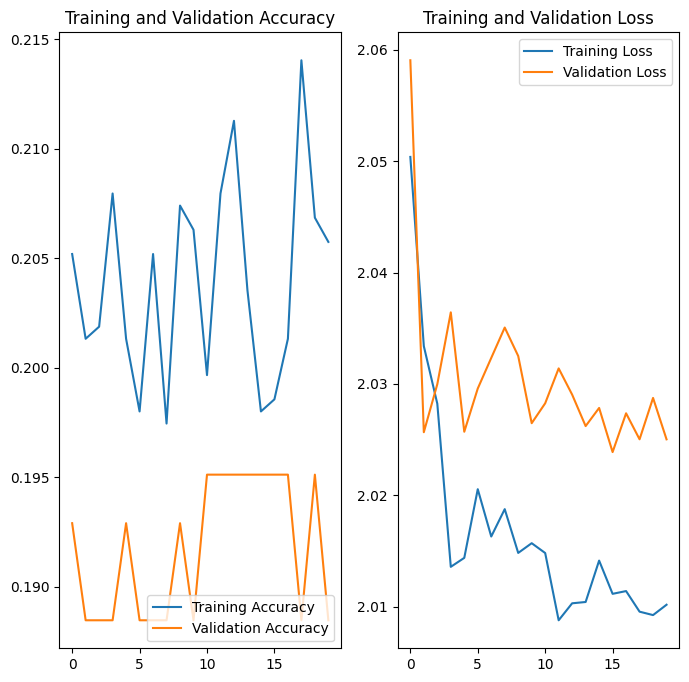

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

a. Though the model is underfitting, its results are almost similar for training and validation data set.

b. Loss is also decreasing with more training.



# **Todo: Find the distribution of classes in the training dataset.**

**Context**

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

[ ]


In [ ]:
path_list=[]
lesion_list=[]
for i in class_name:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
...,...,...
2254,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2255,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2256,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2257,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion


<BarContainer object of 9 artists>

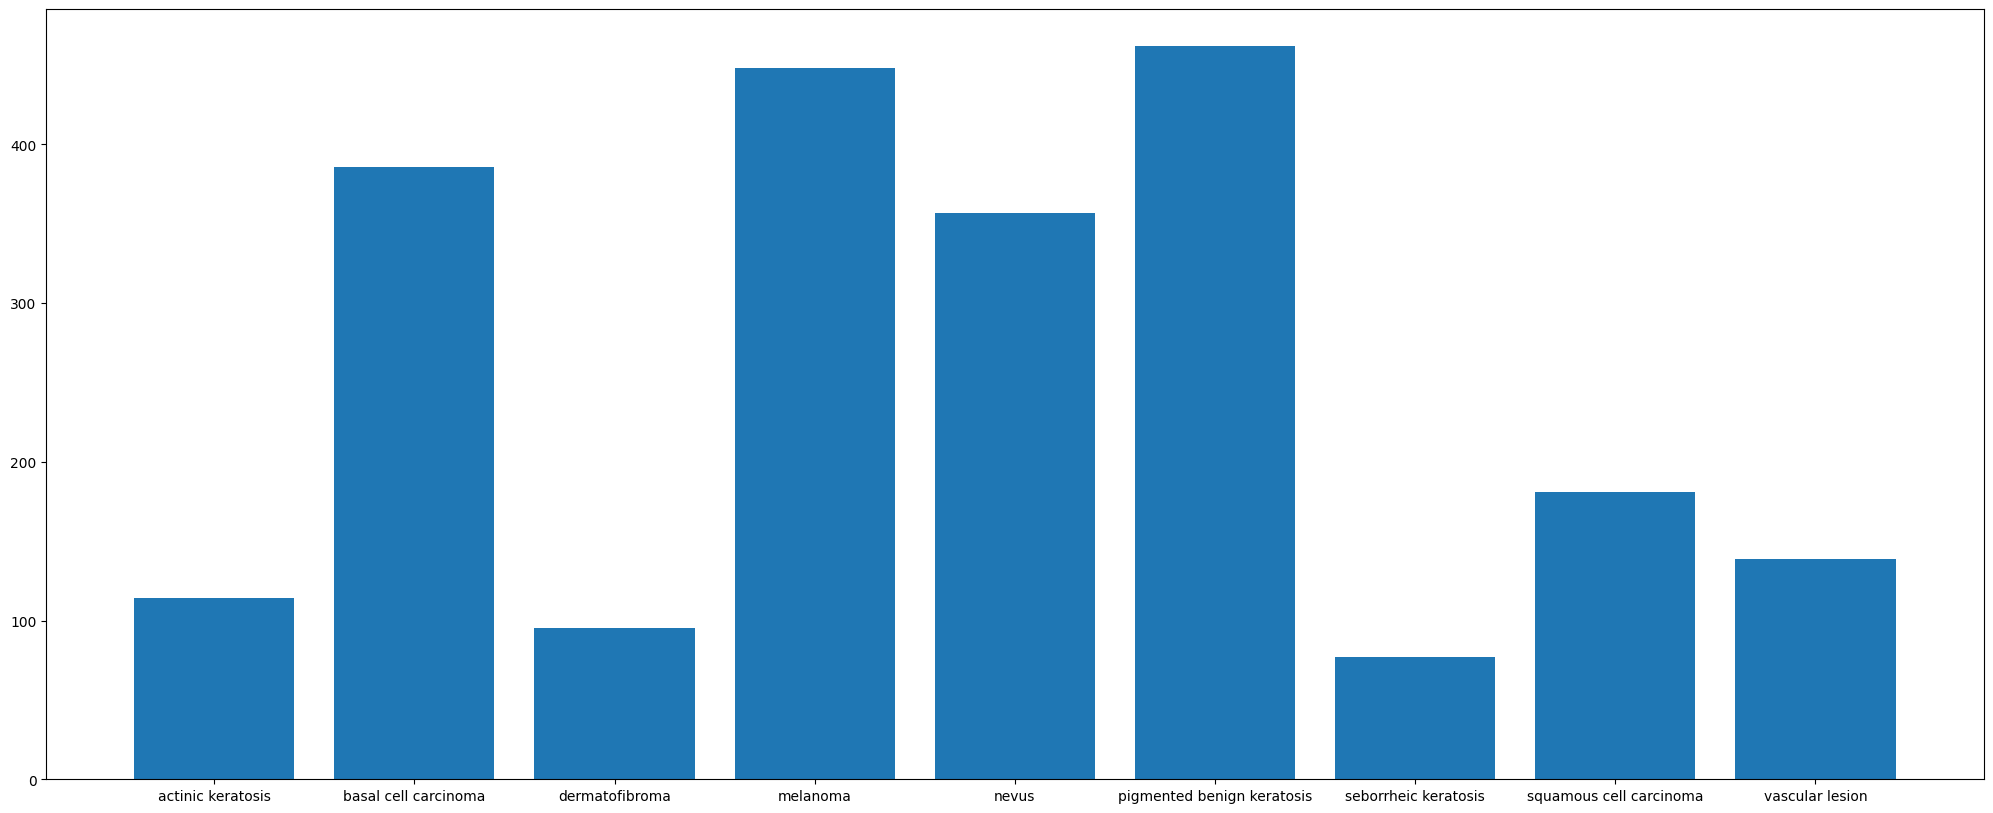

In [ ]:
count=[]
for i in class_name:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_name,count)

## **Todo: Write your findings here:**





**1. Which class has the least number of samples?**

Seborrheic keratosis has the least number of samples

**2. Which classes dominate the data in terms proportionate number of samples?**

Pigmented benign keratosis, Melanoma and Basal cell carcinoma dominate the data in terms of proportionate number of samples

## **Todo: Rectify the class imbalance**

### **Context**
You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.

2. Define a number of operations to perform on this data set using your Pipeline object.

3. Execute these operations by calling the Pipeline’s sample() method.

In [ ]:
path_to_training_dataset= "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_name:
    if i != ".ipynb_checkpoints":
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC4E6FD9130>: 100%|██████████| 500/500 [00:23<00:00, 21.70 Samples/s]


Initialised with 386 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC4E6F1D8E0>: 100%|██████████| 500/500 [00:20<00:00, 24.38 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC4E79EF100>: 100%|██████████| 500/500 [00:24<00:00, 20.18 Samples/s]


Initialised with 448 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC4E7995A30>: 100%|██████████| 500/500 [01:55<00:00,  4.32 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC4E798A340>: 100%|██████████| 500/500 [01:50<00:00,  4.53 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC4E66AC9D0>: 100%|██████████| 500/500 [00:22<00:00, 22.02 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC58825E0D0>: 100%|██████████| 500/500 [00:50<00:00,  9.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC56075EDF0>: 100%|██████████| 500/500 [00:23<00:00, 21.60 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC560420400>: 100%|██████████| 500/500 [00:23<00:00, 21.31 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### **Let's see the distribution of augmented data after adding new images to the original training data.**


In [ ]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031012.jpg_e0814b01-4ee7-4f84-9d38-dea52eb7d016.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027303.jpg_f37eeb77-1103-486b-b770-2123ca7332ee.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026203.jpg_d4d74226-e441-4b57-86dc-ad80e0e83d61.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030953.jpg_5f0af73b-47a7-47a3-944b-622b43c100f8.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squ

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-46-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      948
basal cell carcinoma          886
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.



### **Todo: Train the model on the data created using Augmentor**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

### **Todo: Create a training dataset**

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6759 files belonging to 9 classes.
Using 1351 files for validation.


# MODEL 3

### **Todo: Create your model (make sure to include normalization)**

In [ ]:
num_classes = len(class_name)
model = Sequential([data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### **Todo: Compile your model (Choose optimizer and loss function appropriately)**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Todo: Train your model**

In [ ]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
57/57 [==============================] - 10s 177ms/step - loss: 1.0120 - accuracy: 0.6394 - val_loss: 1.3631 - val_accuracy: 0.5048
Epoch 2/30
57/57 [==============================] - 11s 196ms/step - loss: 1.0157 - accuracy: 0.6350 - val_loss: 1.4075 - val_accuracy: 0.4767
Epoch 3/30
57/57 [==============================] - 14s 247ms/step - loss: 1.0339 - accuracy: 0.6272 - val_loss: 1.4730 - val_accuracy: 0.4848
Epoch 4/30
57/57 [==============================] - 14s 247ms/step - loss: 0.9693 - accuracy: 0.6504 - val_loss: 1.3699 - val_accuracy: 0.4959
Epoch 5/30
57/57 [==============================] - 11s 199ms/step - loss: 1.0164 - accuracy: 0.6344 - val_loss: 1.4734 - val_accuracy: 0.4811
Epoch 6/30
57/57 [==============================] - 10s 170ms/step - loss: 0.9807 - accuracy: 0.6460 - val_loss: 1.3045 - val_accuracy: 0.5085
Epoch 7/30
57/57 [==============================] - 14s 249ms/step - loss: 1.0322 - accuracy: 0.6338 - val_loss: 1.3508 - val_accuracy: 0.5107

### **Todo: Visualize the model results**

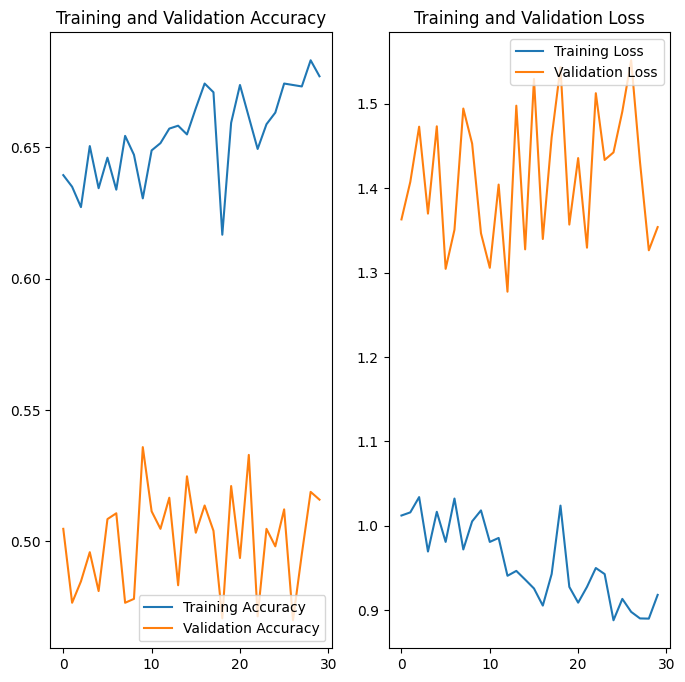

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?**


1. As seen in the model, the class rebalance helped in reducing overfitting of the data and thus the loss is beng reduced. But it reduced the Acurracy to very low.

2. Initially we tried without the ImageDataGenerator which created data to overfit at high ratio

3. Then we introduced dropout and ImageDataGenerator which reduced the overfit

4. At last we tried Batch Normalization and Augumentation which really helped in carry forward

